Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Allele A reached 1.0 after 141 generations


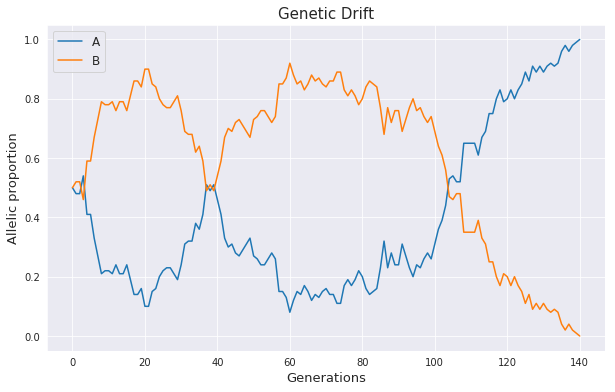

allele a lost from the population at 45 generations


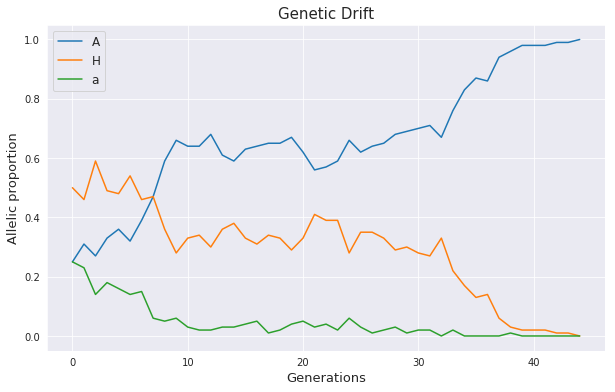

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
%matplotlib inline

# TASK ONE

# task_one_pop function creates a population of A and B alleles with size and ratio as the function arguments
def task_one_pop(size, ratio):
    allele_1 = int(size*ratio)
    allele_2 = int(size-allele_1) # allele_2 proportion defined as 1 - allele_1 given only 2 alleles here
    A = list('A')*allele_1
    B = list('B')* allele_2
    pop = A+B
    return pop

# task_one_func takes that initial population and generates new generations  by randomly sampling 100 alleles from each successive population
def task_one_func(pop, generations):
    proportion_A = [pop.count('A')/len(pop)] # calculate initial proportions
    proportion_B = [pop.count('B')/len(pop)]
    pop_range = range(len(pop))
    generation = 1
    
    while generation <= generations: # iterates over each generation upto that which we define when calling the funciton
        pop_next = []
        for i in pop_range: # iterates over each allele in population ensuring successive populatioins are of the same size
            random_index = randrange(len(pop))
            pop_next.append(pop[random_index]) # samples allele at random with replacement from previous population and adds it to the new population

        pop = pop_next # updates the population for each generation
        proportion_A.append(pop.count('A')/len(pop)) # computes the allelic proportions for each generation
        proportion_B.append(pop.count('B')/len(pop))
        generation += 1
        
        if (proportion_A[-1] >= 1 or proportion_A[-1] <= 0): # terminates the simulation once allele moves to fixation
            return proportion_A, proportion_B, generation


# By default I will pass 100 and 0.5 for size and ratio as specified in the assignment instructions
pop = task_one_pop(100,0.5)

generations = 1000 # 1000 generations passed to funciton as specified in the assignment
proportion_A, proportion_B, generation = task_one_func(pop, generations)

print('Allele A reached ' +str(proportion_A[-1])+ ' after ' + str(generation) + ' generations')

# plots the genetic drift of each allele through the generations
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
x = np.arange(0,len(range(generation)),1)
line_1 = ax.plot(x, proportion_A)
line_2 = ax.plot(x, proportion_B)
plt.legend('AB', fontsize=12)
plt.xlabel('Generations', fontsize=13)
plt.ylabel('Allelic proportion', fontsize=13)
plt.title('Genetic Drift', fontsize=15)
plt.show()

# TASK TWO

# task_two_pop function creates a population of homozygous Dominant, heterozygous and homozygous recessive individuals. Size of population passed in as a parameter.
def task_two_pop(size):
    pop = []
    A_homo = ['A','A']
    hetero_1 = ['A','a']
    hetero_2 = ['a','A']
    a_homo = ['a','a']
    for i in range(int(size/4)):
        pop.append(A_homo)
        pop.append(a_homo)
        pop.append(hetero_1)
        pop.append(hetero_2)
    return pop

# task_two_function takes the initial population and generates new generations by randomly sampling two individuals from the population and randomly selecting one allele from each individual.
def task_two_function(pop, generations):
    homo_A_prop = [pop.count(['A', 'A'])/len(pop)] # calculates initial allelic proportions
    hetero_prop = [(pop.count(['a', 'A']) + pop.count(['A', 'a'])) /len(pop)]
    homo_a_prop = [pop.count(['a', 'a'])/len(pop)]
    pop_size = len(pop)
    generation = 1
    
    while generation <= generations: # iterates over each generation upto that which we define when calling the funciton
        pop_next = []
        while len(pop_next) < pop_size: # ensures each successive population has the same number of individuals as the initial population
            parent_1_allele = pop[randrange(len(pop))][randrange(2)] # draw parent at random
            parent_2_allele = pop[randrange(len(pop))][randrange(2)]
            child = [parent_1_allele] + [parent_2_allele] # draw allele from each parent at random

            if child[0] == 'a' and child[1] == 'a': # select homozygous recessive children
                fitness = randrange(100)
                if fitness < 80: # 20% of aa children are selected ouf and are not added to the next generation
                    pop_next.append(child)
            else:
                pop_next.append(child)
        pop = pop_next # updates population for each generation
        homo_A_prop.append(pop.count(['A', 'A'])/len(pop)) # computes the allelic proportions for each generation
        hetero_prop.append((pop.count(['A', 'a']) + pop.count(['a', 'A']))/len(pop))
        homo_a_prop.append(pop.count(['a', 'a'])/len(pop))

        generation += 1
        if (hetero_prop[-1]) <= 0: # terminates the simulation once alleles moved to fixation
            return homo_A_prop, hetero_prop, homo_a_prop, generation

# by default initial population is set at 100 as per assignment instructions
pop = task_two_pop(100)

generations = 500 # 500 generations passed to funciton as specified in the assignment

homo_A_prop, hetero_prop, homo_a_prop, generation = task_two_function(pop, generations)

print('allele a lost from the population at ' + str(generation) + ' generations')

# plots the genetic drift of each allele through the generations
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
x = np.arange(0,len(range(generation)),1)
line_1 = ax.plot(x, homo_A_prop)
line_2 = ax.plot(x, hetero_prop)
line_3 = ax.plot(x, homo_a_prop)
plt.legend('AHa',fontsize=12)
plt.xlabel('Generations', fontsize=13)
plt.ylabel('Allelic proportion', fontsize=13)
plt.title('Genetic Drift', fontsize=15)
plt.show()

